# Activity 2 - Data Visualization
**2020 Data Labs REU**

*Written by Sage Lichtenwalner, Rutgers University, June 6, 2020*

In this notebook we will cover some of basics of plotting in python, primarily using the [matplotlib](https://matplotlib.org) library.  We've actually already used this library, as it is built into the pandas and xarray libraries to provide quick plotting capabilities.  But if we want to customize our charts, it's often better to create them directly using matplotlib function calls.

The examples today will continue to use the mooring timeseries data available from [NDBC](https://www.ndbc.noaa.gov) in order to demonstrate timeseries, scatterplots, histograms and box plots.

For an example of other graph types commonly seen in oceanography, including profiles and TS diagrams, check out Bonus Activity 4, which demonstrates how to load and plot profile data from the [ARGO](https://www.aoml.noaa.gov/phod/argo/) drifter network.

In [1]:
# Notebook setup
import xarray as xr
!pip install netcdf4

import matplotlib.pyplot as plt

# NDBC Timeseries
Following our example from yesterday, let's load some timeseries data from an NDBC mooring.  We will use this dataset to show how to customize your plot.

In [0]:
# Open dataset
ds = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')

# Subset the dataset to 1 year
ds = ds.sel(time=slice('2019-01-01','2020-01-01'))

## Convert Xarray Dataset to Pandas Dataframe
Yesterday we used the power of Xarray to load our NDBC dataset directly from a Thredds server.  Xarray is great, especially when dealing with 3D or 4D datasets. But it can overcomplicate things.  For example, our NDBC dataset actually loads with 3 dimensions (time, latitude and longitude), but we only need 1 (time).

Here are a few example plotting calls.  Can you tell what's different in the output for each?

In [0]:
# Built in xarray plotting
# ds.sea_surface_temperature.plot();

# Plot using matplotlib - This won't work
# plt.plot(ds.sea_surface_temperature);

# Plot using matplotlib - This will, but the units are wrong
# plt.plot(ds.sea_surface_temperature.squeeze())

# Plot using matplotlib - Correctly plotted with time
# plt.plot(ds.time,ds.sea_surface_temperature.squeeze());

To simply things, we can convert our Xarray Dataset to a Pandas Dataframe, which will give use something like a spreadsheet of columns for each variable, and rows for each measurement time.

Here's how easy it is to convert.

In [4]:
# Convert to Pandas Dataframe
df = ds.to_dataframe()
df.head()

wind_dir  ...  water_level
latitude  longitude  time                           ...             
40.250999 -73.164001 2019-01-01 00:50:00     135.0  ...          NaN
                     2019-01-01 01:50:00     127.0  ...          NaN
                     2019-01-01 02:50:00     137.0  ...          NaN
                     2019-01-01 03:50:00     150.0  ...          NaN
                     2019-01-01 04:50:00     168.0  ...          NaN

[5 rows x 13 columns]

Unfortunately, there's still a bit of complexity here because of the multi-dimensional index.  If we try to plot this now, we get some crazy labels.

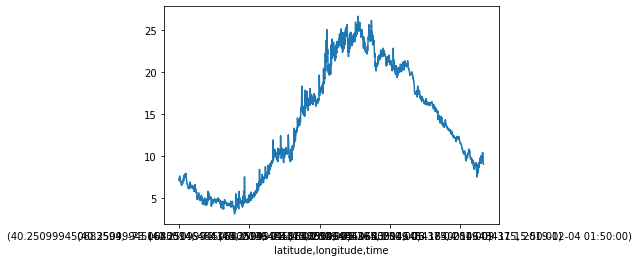

In [5]:
df.sea_surface_temperature.plot();

Here's how we can properly convert this Dataset to a Dataframe.

In [6]:
# Convert to Pandas Dataframe
df = ds.to_dataframe().reset_index().set_index('time')
df.head()

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
time,,,,,,,,,,,,,,,
2019-01-01 00:50:00,40.250999,-73.164001,135.0,11.3,14.1,1.56,00:00:05.559999,00:00:04.710000,153.0,1018.400024,8.1,7.1,NaN,NaN,NaN
2019-01-01 01:50:00,40.250999,-73.164001,127.0,11.2,14.0,1.92,00:00:05.880000,00:00:05.090000,135.0,1016.599976,8.3,7.1,NaN,NaN,NaN
2019-01-01 02:50:00,40.250999,-73.164001,137.0,12.7,15.3,2.23,00:00:06.250000,00:00:05.219999,143.0,1013.599976,8.7,7.2,NaN,NaN,NaN
2019-01-01 03:50:00,40.250999,-73.164001,150.0,13.7,16.9,2.52,00:00:06.670000,00:00:05.489999,148.0,1010.700012,9.5,7.2,NaN,NaN,NaN
2019-01-01 04:50:00,40.250999,-73.164001,168.0,9.5,11.2,2.77,00:00:07.139999,00:00:05.750000,141.0,1010.000000,10.2,7.2,NaN,NaN,NaN


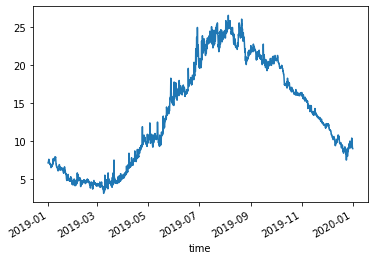

In [7]:
# Yes, even Pandas has built in plotting
df.sea_surface_temperature.plot();

And now we're off to the races (again).

### Exporting Data
One quick aside... Pandas also allows you to quickly export your data, which you can use to load the dataset into another program like Excel.  Here's a quick example.

In [0]:
df[['air_temperature','sea_surface_temperature','wind_spd']].to_csv('44025data.csv')

## Customizing Timeseries Plots
[Matplotlib](https://matplotlib.org) provides quite a few ways to customize your plot.  

### Customizing Lines
Here are some of the more common parameters you will typically use when creating your plot.

* **linewidth** - For example 0.5, 1, 2...
* **linestyle** - For example '-','--', or ':' or other [basic](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) or [advanced](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html) styles
* [**color**](https://matplotlib.org/gallery/color/named_colors.html)
* [**marker**](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
* **label** - The name of the line, used in a legend (see the next section)

For reference and inspiration, you can also check out the [Matplotlib Gallery](https://matplotlib.org/gallery/index.html).

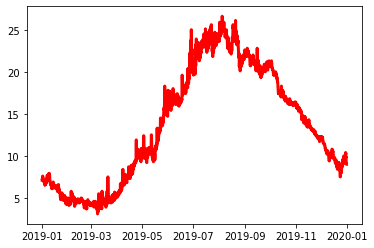

In [9]:
# Line Example
plt.plot(df.index,df.sea_surface_temperature, color='red', linewidth=3)

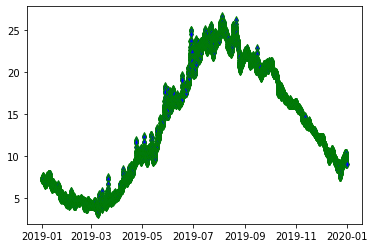

In [10]:
# Custom Markers Example
plt.plot(df.index,df.sea_surface_temperature, color='red', linestyle='', 
         marker='d', markerfacecolor='b', markeredgecolor='g', markersize=5)

In [0]:
# Your Turn - Create a graph of air temperature using blue dots

### Customizing the Axis
* Axis Title: `plt.title('Title')`
* Legend: `plt.legend()`
* Axes Labels: `plt.xlabel('Time')` or `plt.ylabel('Temperature')`
* Axes Limits: `plt.ylim([-5,5])`

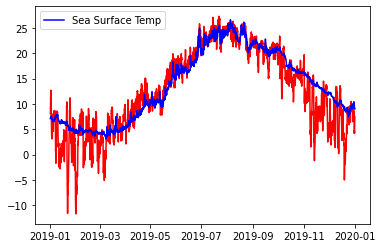

In [12]:
# Incomplete Example
plt.plot(df.index,df.air_temperature, color='red')
plt.plot(df.index,df.sea_surface_temperature, color='blue', label='Sea Surface Temp')
plt.legend();

In [0]:
# Your Turn - Fix the legend, and add a title and y label to the above plot. 

### Customizing Time Axes Limits
There are a few ways you can change the x-axis limits when you are working with timeplots.  By default, plots will show the full range of data, with a little bit of padding on each side.

To plot just the full **Full Time Range** of data, you can use
`plt.xlim(df.index.min(),df.index.max())` 

To plot a **Specific Time Range**, you can use
`plt.xlim(datetime.date(2017,4,1),datetime.date(2019,10,1))`
Note you will need to run `import datetime` first for this command to run.

When you customize date limits you may also need to rotate your tick labels to prevent them from overlapping.  One solution that might work is 
`plt.xticks(rotation=45)`

In [0]:
# Your Turn - Try changing the y and/or x limits for the above plot

### Adding Subplots and Saving
We can create a figure with multiple plots using the subplots feature.

And we can save a figure to a file using `fig.savefig()`

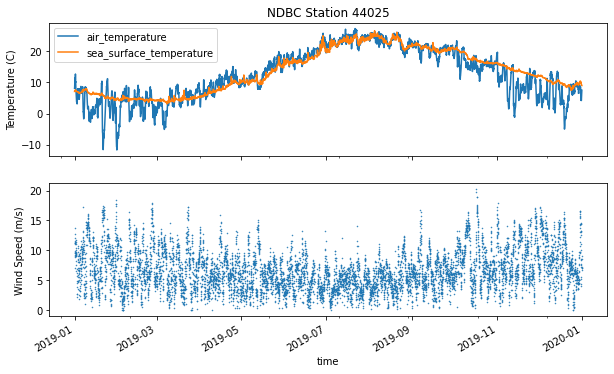

In [14]:
# Subplot example
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))

df.air_temperature.plot(ax=ax1)
df.sea_surface_temperature.plot(ax=ax1)
df.wind_spd.plot(ax=ax2, marker='.',linestyle='',markersize=1)

ax1.legend()
ax1.set_ylabel('Temperature (C)')
ax2.set_ylabel('Wind Speed (m/s)')
ax1.set_title('NDBC Station 44025');

# Save the figure to a file
fig.savefig('44025_example.png')

In [0]:
# Your Turn - Recreate the above plot with a 3rd or 4th subplot using other variables

## Scatterplot
When two variables are plotted against each other, this is typically called a scatterplot.  They are really no different than the plots we crated above.  We just need to pick two variables, and use a marker instead of a line.

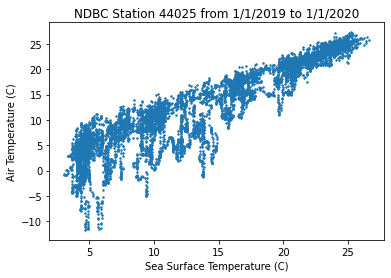

In [16]:
# One way - Using a modified plot() call
plt.plot(df.sea_surface_temperature,df.air_temperature, linestyle='', marker='.', markersize=3)

# Another (better) way - Using scatter()
# plt.scatter(df.sea_surface_temperature, df.air_temperature, s=3)

plt.xlabel('Sea Surface Temperature (C)')
plt.ylabel('Air Temperature (C)')
plt.title('NDBC Station 44025 from 1/1/2019 to 1/1/2020');

In [0]:
# Your Turn - Create a scatterplot of winds vs. waves

One of the big advantages of the `.scatter()` function, is that you can also color and size the dots based on a variable, rather than having them all be the same.

In [0]:
# Your Turn - Now try coloring it using temperature or time

## Histogram
We can easily create [histograms](https://matplotlib.org/gallery/statistics/hist.html?highlight=histogram) of a single variable.  Use the `bins` parameter to increase or decrease the number of data bins.

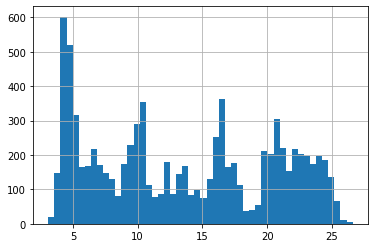

In [19]:
# We can also easily create histograms
df['sea_surface_temperature'].hist(bins=50);

In [0]:
# Your Turn - Create a histogram of another variable

## Box Plots
You can also create box plots of your data rather easily.  You could also create [violin plots](https://matplotlib.org/3.2.1/gallery/statistics/boxplot_vs_violin.html).

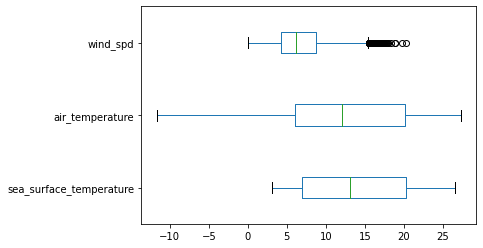

In [21]:
# And boxplots
df[['sea_surface_temperature','air_temperature','wind_spd']].plot.box(vert=False);

## Bar Plots
Bar plots are a very common data visualization, but not typically used with this kind of dataset.  

That said, a bar plot could be used to show monthly averages (more on how to calculate them tomorrow) or anomalies.  

Here's a quick (albeit crude) example that shows the monthly averages for the dataset we've been working with.

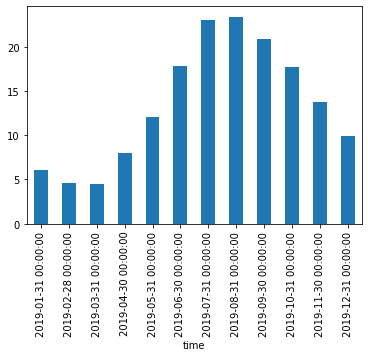

In [22]:
df.sea_surface_temperature.resample('M').mean().plot.bar();

Obviously, we'd need to work on the date labels, but hopefully this gives you a general idea.

## Two Axes on the same Plot
In addition to using subplots, some scientists like to plot two variables on the same graph. For example, you can create two y-axes using the left and right sides.  Using 2 x-axes is also common with CTD profile plots.

Personally I'm not a huge fan of this, but it can be effective for some datasets and audiences, like your fellow scientists who are used to this typ of graph.  Just don't try to plot more than 2 axes together, that's just heresy ;)

The following example uses 2 y-axes to plot both Water Temperature and Dissolved Oxygen from an estuarine site near Atlantic City.  This was adapted from this [example](https://matplotlib.org/gallery/api/two_scales.html).  

Also, noticed how we can load, subset and convert from xarray to pandas all in one line.  This "chaining" of commands, is one of the great features of Python.

In [0]:
# Load a JCNERR Estuarine Station from NDBC
nerr = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/ocean/jctn4/jctn4o9999.nc')
nerr = nerr.sel(time=slice('2019-06-01','2020-06-01')).to_dataframe().reset_index().set_index('time')

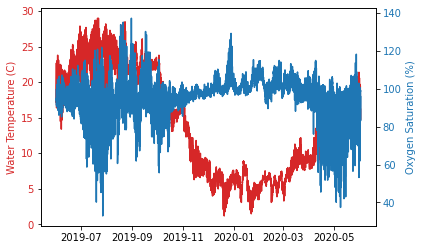

In [24]:
# A graph with 2 Y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # Create a second axes that shares the same x-axis

color = 'tab:red'
ax1.plot(nerr.index, nerr.water_temperature, color=color)
ax1.set_ylabel('Water Temperature (C)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.plot(nerr.index, nerr.o2_saturation, color=color)
ax2.set_ylabel('Oxygen Saturation (%)', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

This graph would probably look a bit cleaner if we averaged the data a bit.  But that's an exercise for another day.

## Changing the default plot style
Finally, while the plots we've created in this notebook work well, we can also jazz them up a bit.  We can use the `set` feature in the [seaborne](https://seaborn.pydata.org) library to customize the style of our plots. Out of the box, seaborne provides a number of options, including: darkgrid, whitegrid, dark, white, and ticks.  The default (darkgrid) is pretty nice.

You can try this out by running the following cell to import the library and override the default plot settings.  Then try rerunning the various plot commands above to see what it looks like.

In [25]:
# Let's make our plots pretty
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Additional Resources
If you are interested in seeing some additional examples of the plotting features available in python, I encourage you to visit the following pages.

* [Matplotlib Examples](https://matplotlib.org/gallery/index.html) - See what else this library can do.
* [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html) - A great library for creating good-looking common statistical graphs.
* [Altair Example Gallery](https://altair-viz.github.io/gallery/index.html) - A more advanced tool for creating interactive graphs.
* [Python Graph Gallery](https://python-graph-gallery.com/) - A great resource for learning about common data visualization styles and how to create them in python.